# Hometask

### Titanic Dataset

The Titanic dataset is a classic binary classification problem focused on predicting the survival of passengers based on various attributes. Below is an overview of the key components of the dataset.

#### Files

- **train.csv** – Training data including labels (`Survived`).
- **test.csv** – Test data for which survival predictions need to be made.

#### Target Variable

- **Survived**:  
  - `0` = Did not survive  
  - `1` = Survived

#### Passenger Features

| Column Name       | Description                                 | Type        |
|-------------------|---------------------------------------------|-------------|
| **PassengerId**   | Unique identifier for each passenger        | Integer     |
| **Pclass**        | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)     | Categorical |
| **Name**          | Full name of the passenger                  | Text        |
| **Sex**           | Gender (`male`, `female`)                   | Categorical |
| **Age**           | Age in years                                | Numeric     |
| **SibSp**         | # of siblings/spouses aboard                | Integer     |
| **Parch**         | # of parents/children aboard                | Integer     |
| **Ticket**        | Ticket number                               | Text        |
| **Fare**          | Fare paid                                   | Numeric     |
| **Cabin**         | Cabin number                                | Text        |
| **Embarked**      | Port of Embarkation (`C`, `Q`, `S`)         | Categorical |




*** 
### Using `titanic_train.csv` and `titanic_test.csv` Together

The Titanic dataset consists of two files:

- **`titanic_train.csv`** – This file contains both the features and the target variable `Survived`.
- **`titanic_test.csv`** – This file contains only the features. The `Survived` column is not provided.

To streamline the data preprocessing process and avoid redundancy, I will **combine both `titanic_train.csv` and `titanic_test.csv`** into one dataset. This will allow me to apply the same preprocessing steps to both datasets simultaneously.

After preprocessing, I will split the combined dataset back into:
1. `train` for model training and evaluation.
2. `test` for making predictions and submitting to Kaggle.

Since `titanic_test.csv` does not contain the `Survived` labels, I will evaluate the model performance using `titanic_train.csv` and make predictions on `titanic_test.csv` for final submission.

### Import

In [210]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier

### Loading the Titanic dataset

In [179]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train['source'] = 'train'
test['source'] = 'test'
test['Survived'] = np.nan 

df = pd.concat([train, test], sort=False)
df = df.reset_index(drop=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


### Statistical Summary of the Data

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [181]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Checking Class Distribution

In [182]:
df.groupby('Survived').size()

Survived
0.0    549
1.0    342
dtype: int64

***
## Visualizing the Data

### Missing Data

<Axes: >

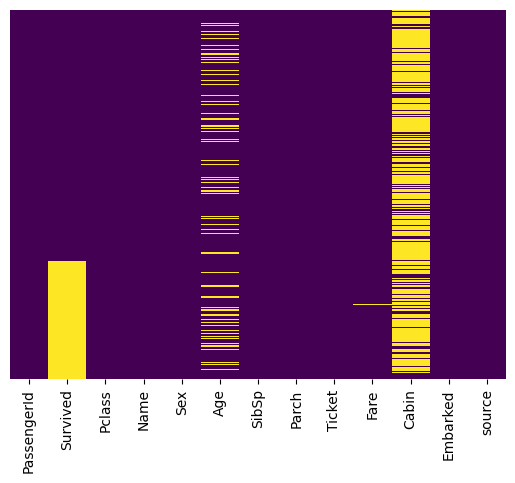

In [183]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Missing Data Overview

The Titanic dataset contains several missing values in various columns. Here's an overview of the columns with missing data:

1. **Survived**:
   - Missing values: 418 (Out of 1309 entries)
   - The target variable, so it is expected to have missing values in the test set.

2. **Age**:
   - Missing values: 263 (Out of 1309 entries)
   - Age is a continuous variable and missing values can be imputed with various strategies (e.g., mean, median, or using other features).
3. **Cabin**:
   - Missing values: 1014 (Out of 1309 entries)
   - Cabin has a high percentage of missing values, and it could be either dropped or imputed with a placeholder value (e.g., "Unknown").


#### Summary:
- The columns with the most missing values are **Cabin** and **Age**.
- Missing values need to be addressed before training the model. Imputation or removal of rows/columns with missing data is typically done.


### Overall passenger survival distribution

<Axes: xlabel='Survived', ylabel='count'>

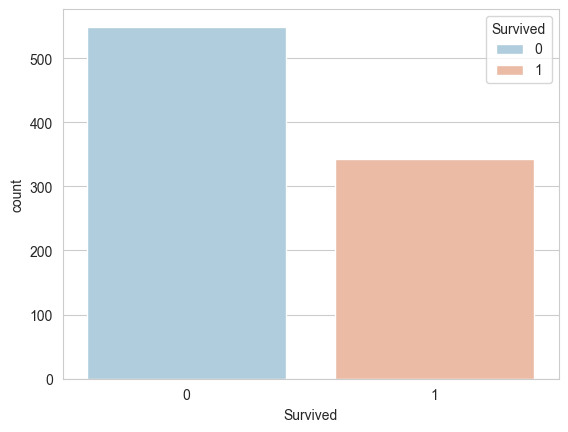

In [184]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue ="Survived",data=train,palette='RdBu_r')

### Survival statistics by gender

<Axes: xlabel='Survived', ylabel='count'>

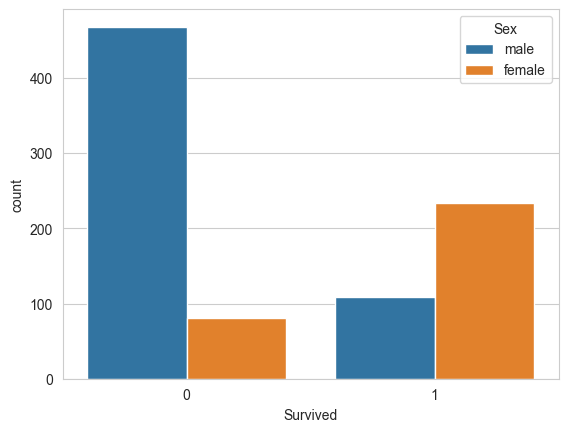

In [185]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

### Survival by ticket class

<Axes: xlabel='Survived', ylabel='count'>

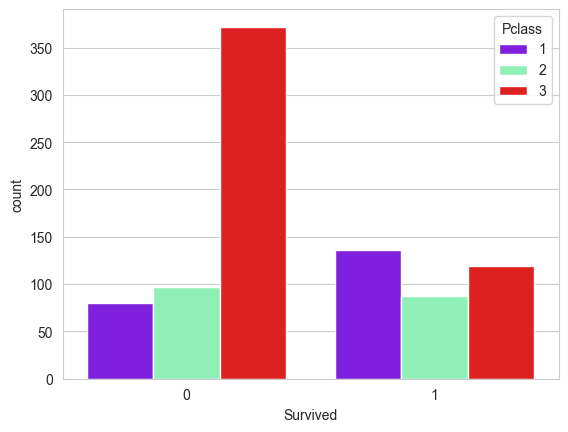

In [186]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

### Passenger age distribution

<Axes: xlabel='Age', ylabel='Count'>

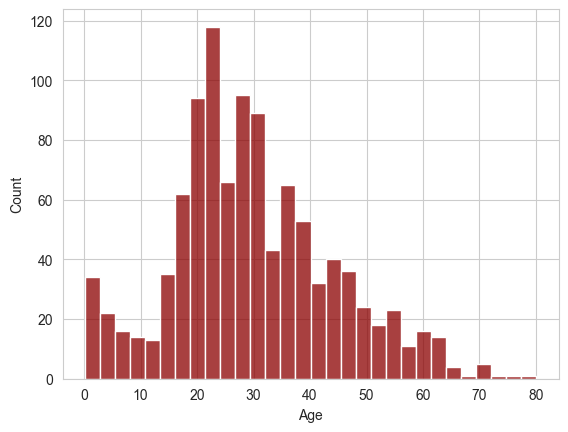

In [187]:
sns.histplot(df['Age'].dropna(),kde=False,color='darkred',bins=30)

### Number of relatives on board

<Axes: xlabel='SibSp', ylabel='count'>

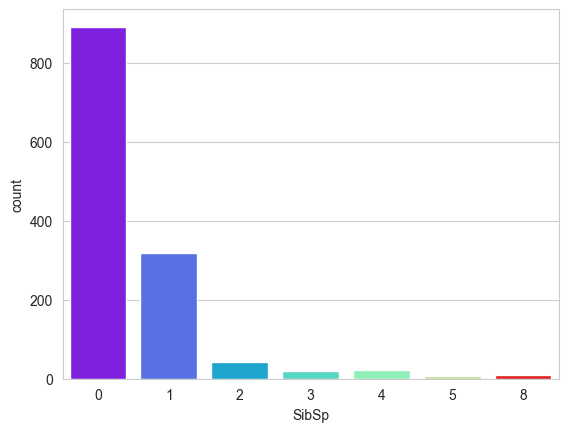

In [188]:
sns.countplot(x='SibSp',hue='SibSp', data=df,palette='rainbow',legend=False)

## Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

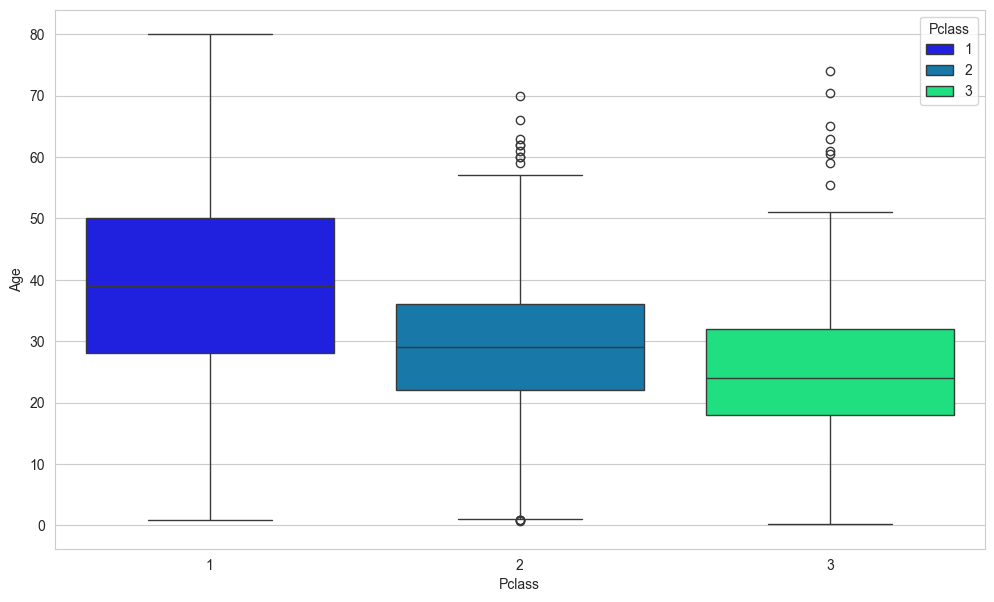

In [189]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',hue='Pclass',data=df,palette='winter')

We'll use these `average age values` ​​to impute based on Pclass for Age.

In [5]:
def impute_age(row):
    Age = row['Age']
    Pclass = row['Pclass']
    if pd.isnull(Age):
        if Pclass == 1:
            return 39
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

Apply that function to fill in empty rows

In [190]:
df['Age'] = df.apply(impute_age, axis=1)

Drop the Cabin column

In [191]:
df.drop('Cabin',axis=1,inplace=True)

In [192]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Check that heat map again

<Axes: >

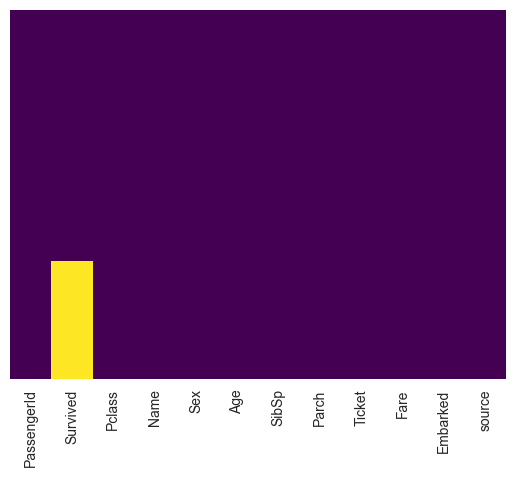

In [193]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Super!!)

## Converting Categorical Features

Processing categorical variables

In [194]:
sex = pd.get_dummies(df['Sex'],drop_first=True).astype(int)
embark = pd.get_dummies(df['Embarked'],drop_first=True).astype(int)

Remove unnecessary or already encoded columns:

In [195]:
train_ids = train["PassengerId"]
test_ids = test["PassengerId"]

df.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

Merged dataframe with new numeric columns

In [196]:
df = pd.concat([df,sex,embark],axis=1)

### Splitting the Combined Data
Use the `source` column that was added during preprocessing to separate the data into `train` and `test` datasets.

In [197]:
train_data = df[df['source'] == 'train'].drop('source', axis=1)
test_data = df[df['source'] == 'test'].drop('source', axis=1)

#### Removing the Survived Column from Test Data

In [198]:
test_data = test_data.drop('Survived', axis=1)

## Training and evaluation

In [199]:
from sklearn.model_selection import train_test_split

X_train = train_data.drop("Survived", axis=1)
y_train = train_data["Survived"]


In [200]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [201]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [202]:
trained_models = {}

### Logistic Regression

In [203]:
log_reg = GridSearchCV(LogisticRegression(), {"C": [0.01, 0.1, 1, 10]}, cv=5, scoring="accuracy", n_jobs=-1)
log_reg.fit(X_train_scaled, y_train)
trained_models["Logistic Regression"] = (log_reg.best_estimator_,log_reg.best_score_)

log_reg.best_score_

np.float64(0.8002322515849603)

### SVM

In [204]:
svm = GridSearchCV(SVC(), {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}, cv=5, scoring="accuracy", n_jobs=-1)
svm.fit(X_train_scaled, y_train)
trained_models["SVM"] = (svm.best_estimator_,svm.best_score_)
svm.best_score_

np.float64(0.8282719226664993)

### MLP 

In [205]:
mlp = GridSearchCV(
    MLPClassifier(max_iter=2000), 
    {
        "hidden_layer_sizes": [(50,), (100,), (50, 50)],
        "alpha": [0.0001, 0.01],
        "learning_rate_init": [0.001, 0.01]  
    },
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
mlp.fit(X_train_scaled, y_train)
trained_models["MLP"] = (mlp.best_estimator_,mlp.best_score_)
mlp.best_score_

np.float64(0.8159688657334756)

### GaussianNB

In [211]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

nb_scores = cross_val_score(nb, X_train_scaled, y_train, cv=5, scoring='accuracy')
nb_mean_score = nb_scores.mean()

trained_models["Naive Bayes"] = (nb,0)
nb_mean_score

np.float64(0.7756135835791853)

### Decision Tree Classifier

In [212]:
dt = GridSearchCV(DecisionTreeClassifier(), {"max_depth": [3, 5, 10, None]},  scoring="accuracy", n_jobs=-1)
dt.fit(X_train_scaled, y_train)
trained_models["Decision Tree"] = (dt.best_estimator_,dt.best_score_)
dt.best_score_

np.float64(0.8136902893729208)

### Random Forest Classifier

In [213]:
rf = GridSearchCV(RandomForestClassifier(), {"n_estimators": [50,25, 100, 200]},  scoring="accuracy")
rf.fit(X_train_scaled, y_train)
trained_models["Random Forest"] = (rf.best_estimator_,rf.best_score_)
rf.best_score_

np.float64(0.8114493754315486)

### Gradient Boosting Classifier

In [214]:
gb = GridSearchCV(GradientBoostingClassifier(), {"n_estimators": [50,25, 100, 200], "learning_rate": [0.01, 0.1]},  scoring="accuracy")
gb.fit(X_train_scaled, y_train)
trained_models["Gradient Boosting"] = (gb.best_estimator_,gb.best_score_)
gb.best_score_

np.float64(0.8372857949908983)

### XGBClassifier

In [217]:
param_grid = {
    "n_estimators": [100, 150, 200, 250, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

xgb = GridSearchCV(
    XGBClassifier( eval_metric='logloss'),
    param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)
xgb.fit(X_train_scaled, y_train)
trained_models["XGBoost"] = (xgb.best_estimator_,xgb.best_score_)
xgb.best_score_

np.float64(0.842910049588852)

### Finding the best model

In [218]:
model_scores = {name: model_info[1] for name, model_info in trained_models.items()}

best_model_name = max(model_scores, key=model_scores.get)

best_model = trained_models[best_model_name][0]

print(f"Best model: {best_model_name} with training accuracy {model_scores[best_model_name]:.4f}")

Best model: XGBoost with training accuracy 0.8429


### Data Scaling and Prediction

In [219]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test_data)

# Make predictions for test data
y_test_pred = best_model.predict(X_test_scaled)

### Create Submission File

In [220]:
submission = pd.DataFrame({
    "PassengerId": test_ids,
    "Survived": y_test_pred
})

submission.to_csv("submission.csv", index=False)

## ` Submit Prediction to Kaggle`


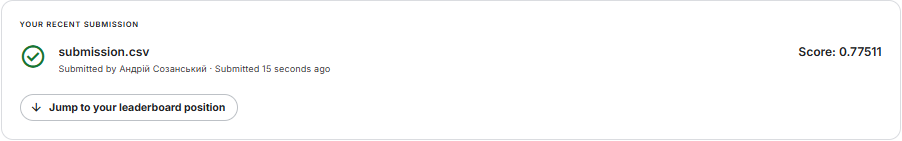